# Problem Set 3 CS129.18

The following problem set will revolve around the Enron Emails dataset.
The dataset `data/enron-data/` directory has 6 files. The objective is to build a classifier for whether email is spam or not.


## Requirements


>Spam or Ham?

Using the lessons on Naive Bayes and TF-IDF, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

**Using Enron 1 and 2**

1. How many Spam Emails are there? ( 1 pt )

2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )

3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )

4. What is the longest ham email? ( 1 pt )

5. What is the accuracy of your model?( 1 pt )

6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)



-----


Bonus : Answer questions 1-6 using Enron 1,2, and 3. (5 pts)

----

**Submit this file on Moodle on the submission link I will provide. This is due October 18 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random

In [2]:
rootdir = "data/enron-data/enron1"
# Loop through all the directories, sub directories and files in the above folder, and print them.
for directories, subdirs, files in os.walk(rootdir):
    print(directories, subdirs, len(files))

data/enron-data/enron1 ['ham', 'spam'] 2
data/enron-data/enron1\ham [] 3672
data/enron-data/enron1\spam [] 1499


In [3]:
ham_list = []
spam_list = []

# Same as before, but this time, read the files, and append them to the ham and spam list
for directories, subdirs, files in os.walk(rootdir):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam_list.append(data)

In [4]:
rootdir2 = "data/enron-data/enron1"

ham_list2 = []
spam_list2 = []

# Same as before, but this time, read the files, and append them to the ham and spam list
for directories, subdirs, files in os.walk(rootdir2):
    if (os.path.split(directories)[1]  == 'ham'):
        for filename in files:      
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                ham_list2.append(data)
    
    if (os.path.split(directories)[1]  == 'spam'):
        for filename in files:
            with open(os.path.join(directories, filename), encoding="latin-1") as f:
                data = f.read()
                spam_list2.append(data)

In [5]:
print(ham_list[0])

Subject: christmas tree farm pictures



In [6]:
print(spam_list[0])

Subject: dobmeos with hgh my energy level has gone up ! stukm
introducing
doctor - formulated
hgh
human growth hormone - also called hgh
is referred to in medical science as the master hormone . it is very plentiful
when we are young , but near the age of twenty - one our bodies begin to produce
less of it . by the time we are forty nearly everyone is deficient in hgh ,
and at eighty our production has normally diminished at least 90 - 95 % .
advantages of hgh :
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore
read
more at this website
unsubscribe


## 1. How many Spam Emails are there? ( 1 pt )
---

In [7]:
enron1_num_spam_emails = len(spam_list)
enron2_num_spam_emails = len(spam_list2)
total_spam_emails = enron1_num_spam_emails + enron2_num_spam_emails

print(f'\nThere are <{total_spam_emails}> spam emails in the enron1 and enron2 directories.')


There are <2998> spam emails in the enron1 and enron2 directories.


## 2. Structure the email data from the 2 directories into 1 dataframe with columns: Status, Subject, Body ( 7 pts )
---

In [24]:
import re

# initialize an emopty dataframe
df = pd.DataFrame()

# initialize lists to be stored to the dataframe
status_lst = []
subject_lst = []
body_lst = []

# initialize complete list of spam emails and populate it with existing spam lists
complete_spam_lst = []
complete_spam_lst.extend(spam_list)
complete_spam_lst.extend(spam_list2)

# initialize complete list of ham emails and populate it with existing ham lists
complete_ham_lst = []
complete_ham_lst.extend(ham_list)
complete_ham_lst.extend(ham_list2)

# initialize regex pattern
pattern_1 = re.compile('Subject:')

# initialize empty string variables for the body data of spam and ham emails
spam_str = ''
ham_str = ''

# parse complete spam list for subject and body data
for spam in complete_spam_lst:
    # split each list item to lines 
    spam_lines = spam.splitlines()
    
    # parse the email's body data by aggregating all lines after index 0 
    # and convert them to a single string
    spam_str = ' '.join(spam_lines[1:])
    
    for line in spam_lines:
        if pattern_1.search(line):
            line = line.strip('Subject:')
            subject_lst.append(line)
            # set status to spam
            status_lst.append('spam')  
            body_lst.append(spam_str)

ceil_body = 0
            
# parse complete ham list for subject and body data
for ham in complete_ham_lst:
    # split each list item to lines 
    ham_lines = ham.splitlines()
    
    # parse the email's body data by aggregating all lines after index 0 
    # and convert them to a single string
    ham_str = ' '.join(ham_lines[1:])
    
    for line in ham_lines:
        if pattern_1.search(line):
            line = line.strip('Subject:')
            subject_lst.append(line)
            
            # set status to ham
            status_lst.append('ham')
            body_lst.append(ham_str)
            
            # get longest ham email            
            if len(ham_str) > ceil_body:
                ceil_body = len(ham_str)
            
# append lists to their respective datframe columns
df['Status'] = status_lst
df['Subject'] = subject_lst
df['Body'] = body_lst

# display longest ham email
print(f'\nThe longest spam email has a length of <{ceil_body}\n')

# display 10 random rows
df.sample(10)


The longest spam email has a length of 31817



,Status,Subject,Body
7690,ham,eastrans nomination - gas day 6 / 22 / 2000,- - - - - - - - - - - - - - - - - - - - - - fo...
4918,ham,spot deals,i have created and entered the following deals...
5288,ham,hpl meter # 980070 rusk d / p - lone star hpl,daren : during the period of 11 / 4 / 99 to 12...
5181,ham,re : spinnaker - supply verification 11958 su...,production fyi . bob - - - - - - - - - - - - -...
1286,spam,"inexplicable crying spells , sadness and / or...","- - - - 22037566626923367 hi varou , setting s..."
6983,ham,re : lst rev feb . 2000 josey ranch nom,daren i since you were at the offsite i went a...
7110,ham,amoco energy 2 / 00,"daren : you put this in , do have a clue ? jul..."
4417,ham,"enron actuals for august 17 , 2000",teco tap 120 . 000 / iferc 20 . 000 / enron ls...
921,spam,how is your nervous pain,never agaln
4246,ham,hpl nomination changes for july 25 and july 26,july 26 final nom - - - 0 - - - inlet hpl @ ea...


## 3. Build a Naive Bayes classifier to classify whether emails are spam or not. ( 3 pts )
---

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

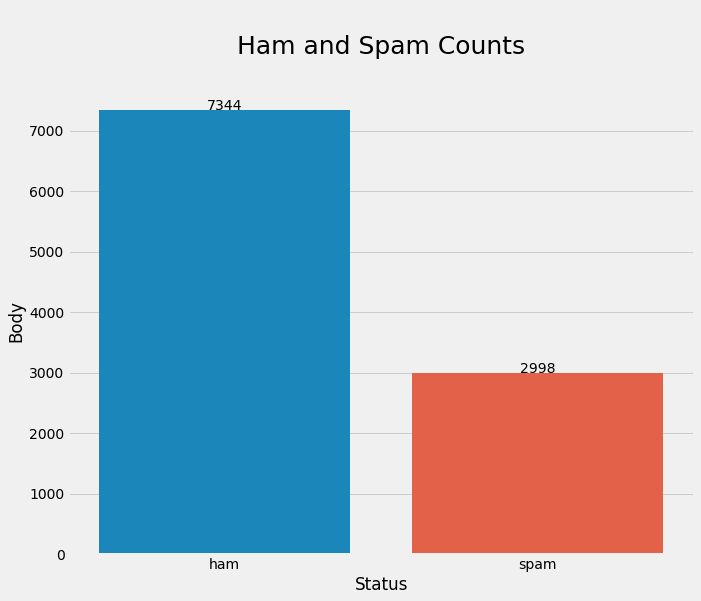

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

df_2 = df.groupby('Status').count()
df_2.reset_index(inplace=True)
ax = sns.barplot(x='Status', y='Body', data=df_2);
ax.set_title('\nHam and Spam Counts\n', fontsize=25)

values = df['Status'].value_counts()

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, values[i], ha="center")

In [12]:
df_len = len(df)
mask = df['Status'] == 'spam'
spam_ct = int(df['Status'].loc[mask].value_counts().values)

print(f'\ntotal email count = {df_len}\ntotal spam count = {spam_ct}')
print(f'\nProbability that a chosen email is spam = {(spam_ct / df_len) * 100:.4f} %')
print(f'Probability that a chosen email is ham = {((df_len - spam_ct) / df_len) * 100:.4f} %\n')


total email count = 10342
total spam count = 2998

Probability that a chosen email is spam = 28.9886 %
Probability that a chosen email is ham = 71.0114 %



In [13]:
# init tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# vectorize all the body data
vectorized_X = vectorizer.fit_transform(df['Body']) 

print('\nrows, features/words:')
vectorized_X.todense().shape


rows, features/words:


(10342, 49349)

In [14]:
# split the vectorized text and labels
train_x, test_x, train_y, test_y = train_test_split(vectorized_X, df["Status"]) 

print(train_x.shape, test_x.shape)

(7756, 49349) (2586, 49349)


In [15]:
# init classifier
classifier = GaussianNB()

# train Gaussian Naive Bayes model
classifier.fit(train_x.todense(), train_y) 

GaussianNB()

## 4. What is the longest ham email? ( 1 pt )
---

In [16]:
mask = df['Status'] == 'ham'
df['email_len'] = df[['Body']].sum(axis=1).str.len()

df.loc[mask].sort_values(by=['email_len'], ascending=False).head(1)

,Status,Subject,Body,email_len
6486,ham,"fw : "" red , white and blue out """,- - - - - original message - - - - - from : ca...,31817


## 5. What is the accuracy of your model?( 1 pt )
---

In [17]:
classifier.score(test_x.toarray(), test_y)

0.9702242846094354

In [18]:
#use cross validation to see how well a gaussiannb classifier would work on our data
scores = cross_val_score(classifier, test_x.toarray(), test_y, cv=2)
acc = scores.mean()
print("Accuracy: %0.2f percent (+/- %0.2f)" % (acc *100, scores.std()))
scores

Accuracy: 93.46 percent (+/- 0.00)


array([0.93271462, 0.93658159])

## 6. Include the Subject in the analysis of the emails, does the accuracy/performance of the model increase? (7 pts)
---

In [19]:
from scipy.sparse import hstack

# init tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# vectorize body and subject data
body_matrix = vectorizer.fit_transform(df['Body']) 
subj_matrix = vectorizer.fit_transform(df['Subject']) 

# Stack sparse matrices horizontally (column wise) 
vectorized_X = hstack((subj_matrix, body_matrix))

# verify vectorized_X content
print('\nrows, features/words:')
type(vectorized_X)

# verify shape of csr_matrix
vectorized_X.shape


rows, features/words:


(10342, 54312)

In [20]:
# split the vectorized text and labels
train_x, test_x, train_y, test_y = train_test_split(vectorized_X, df["Status"]) 

print(train_x.shape, test_x.shape)

(7756, 54312) (2586, 54312)


In [21]:
# init classifier
classifier = GaussianNB()

# train Gaussian Naive Bayes model
classifier.fit(train_x.todense(), train_y) 

GaussianNB()

In [22]:
classifier.score(test_x.toarray(), test_y)

0.9860788863109049

In [23]:
#use cross validation to see how well a gaussiannb classifier would work on our data
scores = cross_val_score(classifier, test_x.toarray(), test_y, cv=2)
acc = scores.mean()
print("Accuracy: %0.2f percent (+/- %0.2f)" % (acc *100, scores.std()))
scores

Accuracy: 94.16 percent (+/- 0.00)


array([0.93967517, 0.94354215])